### 2 - PRE - PROCESSAMENTO - BAG OF WORDS, VETORIZAÇÃO E SELEÇÃO DE CARACTERÍSTICAS

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
# CARREGANDO ARQUIVO
df_content_binario = pd.read_csv('df-content-binario.csv')

####  BAG OF WORDS E VETORIZAÇÃO: TFIDF

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from joblib import dump, load

In [5]:
# CARREGANDO O MODELO COUNT VECTORIZER 
count_vectorizer = load('count-vectorizer.pkl')

In [6]:
variaveis = count_vectorizer.get_feature_names()

In [7]:
vocabulario = count_vectorizer.vocabulary_

### 3 - SELEÇÃO DE VARIÁVEIS

Etapa de seleção de variáveis realizada no pré-processamento parte 3 CV.

### 4 - DADOS DE TREINO E TESTE

In [8]:
import numpy as np

In [9]:
# CARREGANDO DADOS DE TREINO E TESTE
xtreino = pd.read_csv('xtreino.csv')
xteste = pd.read_csv('xteste.csv') 
ytreino = pd.read_csv('ytreino.csv') 
yteste = pd.read_csv('yteste.csv') 

In [10]:
ytreino = np.ravel(ytreino)
yteste = np.ravel(yteste)

In [11]:
# APLICANDO O COUNT VECTORIZED
xtreino = count_vectorizer.transform(xtreino.passo6)
xteste = count_vectorizer.transform(xteste.passo6)

In [12]:
# CRIANDO UM MODELO TFIDF E O APLICANDO AOS DADOS DE TREINO E TESTE
tfidf_vectorizer = TfidfTransformer()

xtreino = tfidf_vectorizer.fit_transform(xtreino)
xteste = tfidf_vectorizer.transform(xteste)

In [13]:
# SALVAR MODELO
dump(tfidf_vectorizer, 'tfidf-vectorizer.pkl')

['tfidf_vectorizer.pkl']

### 5 - APRENDIZADO

In [14]:
import time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

#### DECISION TREE

In [ ]:
# TREINO
inicio = time.time()
dtree = DecisionTreeClassifier()

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
param_grid1 = {"criterion": ["gini","entropy"],
               "random_state": [1]}

# GRID SEARCH
grid1 = GridSearchCV(estimator = dtree, 
                     param_grid = param_grid1, 
                     scoring = 'accuracy',
                     n_jobs = None,
                     refit = True,
                     cv = kfold, 
                     verbose = 1,
                     return_train_score = True)

dtreeTFIDF = grid1.fit(xtreino, ytreino)

ac1 = dtreeTFIDF.best_score_
print(f"Acurácia: {round(ac1*100, 2)}%")
fim = time.time()
print(f"Tempo de treino: {round((fim - inicio)/60, 2)} minutos")
print("\nMelhores hiperparâmetros: ", dtreeTFIDF.best_params_)

In [15]:
# CARREGAR MODELO
dtreeTFIDF = load('dtreeTFIDF.pkl')

In [16]:
dtreeTFIDF.best_params_

{'criterion': 'gini', 'random_state': 1}

Acurácia Teste Decision Tree Unigrama-TFIDF: 90.5%
Tempo de teste: 0.01 minutos

Relatório:

              precision    recall  f1-score   support

    positivo       0.90      0.91      0.90     31558
    negativo       0.91      0.90      0.91     31920

    accuracy                           0.90     63478
   macro avg       0.90      0.91      0.90     63478
weighted avg       0.91      0.90      0.90     63478



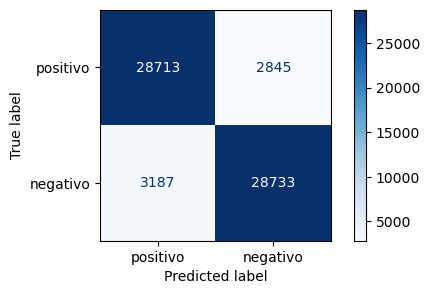

In [17]:
# TESTE
inicio = time.time()
prev_dtreeTFIDF = dtreeTFIDF.predict(xteste)
ac_dtreeTFIDF = accuracy_score(prev_dtreeTFIDF, yteste)
print(f"Acurácia Teste Decision Tree Unigrama-TFIDF: {round(ac_dtreeTFIDF*100, 2)}%")
fim = time.time()
print(f"Tempo de teste: {round((fim - inicio)/60, 2)} minutos\n\nRelatório:\n")
print(classification_report(yteste, prev_dtreeTFIDF, labels = ["positivo", "negativo"]))
fig, axes = plt.subplots(figsize = (6, 3))
plot_confusion_matrix(dtreeTFIDF, xteste, yteste, labels = ["positivo", "negativo"], values_format = 'd', cmap = 'Blues', ax = axes)
plt.savefig('cm-dtreeTFIDF.png', format ='png', bbox_inches = 'tight')
plt.show()

In [18]:
# SALVAR MODELO
dump(dtreeTFIDF, "dtreeTFIDF.pkl")

['dtreeTFIDF.pkl']

#### K-NEAREST NEIGHBOR

In [ ]:
# TREINO
inicio = time.time()
knn = KNeighborsClassifier()

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
param_grid2 = {"n_neighbors": [5,9,15,25,35],
               "weights": ["uniform"],
               "algorithm": ["auto"],
               "leaf_size": [30],
               "p": [2],
               "metric": ["minkowski"]}

# GRID SEARCH
grid2 = GridSearchCV(estimator = knn, 
                     param_grid = param_grid2, 
                     scoring = 'accuracy',
                     n_jobs = None,
                     refit = True,
                     cv = kfold, 
                     verbose = 1,
                     return_train_score = True)

knnTFIDF = grid2.fit(xtreino, ytreino)

ac2 = knnTFIDF.best_score_
print(f"Acurácia: {round(ac2*100, 2)}%")
fim = time.time()
print(f"Tempo de treino: {round((fim - inicio)/60, 2)} minutos")
print("\nMelhores hiperparâmetros: ", knnTFIDF.best_params_)

In [19]:
# CARREGAR MODELO
knnTFIDF = load('knnTFIDF.pkl')

In [20]:
knnTFIDF.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Acurácia Teste KNN Unigrama-TFIDF: 74.41%
Tempo de teste: 9.49 minutos

Relatório:

              precision    recall  f1-score   support

    positivo       0.68      0.93      0.78     31558
    negativo       0.89      0.56      0.69     31920

    accuracy                           0.74     63478
   macro avg       0.78      0.75      0.74     63478
weighted avg       0.78      0.74      0.74     63478



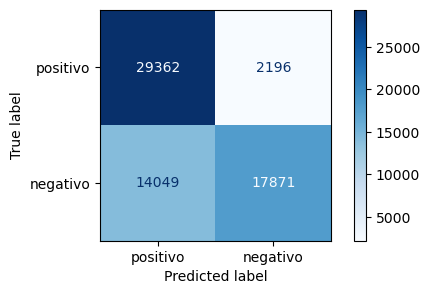

In [21]:
# TESTE
inicio = time.time()
prev_knnTFIDF = knnTFIDF.predict(xteste)
ac_knnTFIDF = accuracy_score(prev_knnTFIDF, yteste)
print(f"Acurácia Teste KNN Unigrama-TFIDF: {round(ac_knnTFIDF*100, 2)}%")
fim = time.time()
print(f"Tempo de teste: {round((fim - inicio)/60, 2)} minutos\n\nRelatório:\n")
print(classification_report(yteste, prev_knnTFIDF, labels = ["positivo", "negativo"]))
fig, axes = plt.subplots(figsize = (6, 3))
plot_confusion_matrix(knnTFIDF, xteste, yteste, labels = ["positivo", "negativo"], values_format = 'd', cmap = 'Blues', ax = axes)
plt.savefig('cm-knnTFIDF.png', format ='png', bbox_inches = 'tight')
plt.show()

In [22]:
# SALVAR MODELO
dump(knnTFIDF, "knnTFIDF.pkl")

['knnTFIDF.pkl']

#### NAIVE BAYES

In [ ]:
# TREINO
inicio = time.time()
nb = MultinomialNB()

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
param_grid3 = {"alpha": [1.0],
               "fit_prior": [True],
               "class_prior": [None]}

# GRID SEARCH
grid3 = GridSearchCV(estimator = nb,
                     param_grid = param_grid3,
                     scoring = 'accuracy',
                     n_jobs = None,
                     refit = True,
                     cv = kfold, 
                     verbose = 1,
                     return_train_score = True)

nbTFIDF = grid3.fit(xtreino, ytreino)


ac3 = nbTFIDF.best_score_
print(f"Acurácia: {round(ac3*100, 2)}%")
fim = time.time()
print(f"Tempo de treino: {round((fim - inicio)/60, 2)} minutos")
print("\nMelhores hiperparâmetros: ", nbTFIDF.best_params_)

In [23]:
# CARREGAR MODELO
nbTFIDF = load('nbTFIDF.pkl')

Acurácia Teste Naive Bayes Unigrama-TFIDF: 92.64%
Tempo de teste: 0.01 minutos

Relatório:

              precision    recall  f1-score   support

    positivo       0.95      0.90      0.92     31558
    negativo       0.90      0.96      0.93     31920

    accuracy                           0.93     63478
   macro avg       0.93      0.93      0.93     63478
weighted avg       0.93      0.93      0.93     63478



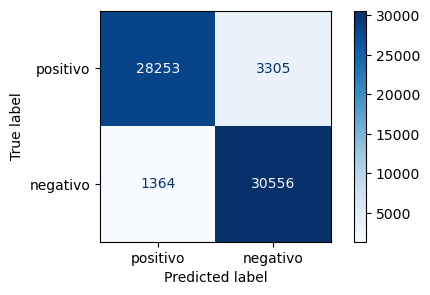

In [24]:
# TESTE
inicio = time.time()
prev_nbTFIDF = nbTFIDF.predict(xteste)
ac_nbTFIDF = accuracy_score(prev_nbTFIDF, yteste)
print(f"Acurácia Teste Naive Bayes Unigrama-TFIDF: {round(ac_nbTFIDF*100, 2)}%")
fim = time.time()
print(f"Tempo de teste: {round((fim - inicio)/60, 2)} minutos\n\nRelatório:\n")
print(classification_report(yteste, prev_nbTFIDF, labels = ["positivo", "negativo"]))
fig, axes = plt.subplots(figsize = (6, 3))
plot_confusion_matrix(nbTFIDF, xteste, yteste, labels = ["positivo", "negativo"], values_format = 'd', cmap = 'Blues', ax = axes)
plt.savefig('cm-nbTFIDF.png', format ='png', bbox_inches = 'tight')
plt.show()

In [25]:
# SALVAR MODELO
dump(nbTFIDF, 'nbTFIDF.pkl')

['nbTFIDF.pkl']

#### XTREME GRADIENT BOOSTING

In [26]:
# FUNÇÃO PARA TRANSFORMAÇÃO DAS CLASSES
def TransformaClasse(array):
    
    for i in range(len(array)):
        if array[i] == "negativo":
            array[i] = 1
        else:
            array[i] = 0
    return(array)

In [27]:
ytreino_transf = TransformaClasse(ytreino)
ytreino_xgb = [value for value in ytreino_transf]

In [28]:
yteste_transf = TransformaClasse(yteste)
yteste_xgb = [value for value in yteste_transf]

In [ ]:
# TREINO
inicio = time.time()
xgb_cl = XGBClassifier()

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
param_grid5 = {"n_estimators": [100,300,700,1000,1100],
               "learning_rate": [0.01,0.2,0.3],
               "gamma": [0.2],
               "max_depth": [6],
               "subsample": [0.7],      
               "colsample_bytree": [0.7],
               "reg_alpha": [0.05],
               "objective": ["binary:logistic"]}

# GRID SEARCH
grid5 = GridSearchCV(estimator = xgb_cl, 
                     param_grid = param_grid5, 
                     scoring = "accuracy",
                     n_jobs = None,
                     refit = True,
                     cv = kfold, 
                     verbose = 1,
                     return_train_score = True)


xgbTFIDF = grid5.fit(xtreino, ytreino_xgb)

ac5 = xgbTFIDF.best_score_
print(f"Acurácia: {round(ac5*100, 2)}%")
fim = time.time()
print(f"Tempo de treino: {round((fim - inicio)/60, 2)} minutos")
print("\nMelhores hiperparâmetros: ", xgbTFIDF.best_params_)

In [29]:
# CARREGAR MODELO
xgbTFIDF = load('xgbTFIDF.pkl')

In [30]:
xgbTFIDF.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 6,
 'n_estimators': 1000,
 'objective': 'binary:logistic',
 'reg_alpha': 0.05,
 'subsample': 0.7}

Acurácia Teste XGBoost Unigrama-TFIDF: 93.82%
AUC XGBoost Unigrama-TFIDF: 0.9787
Tempo de teste: 0.1 minutos

Relatório:

              precision    recall  f1-score   support

    positivo       0.94      0.94      0.94     31558
    negativo       0.94      0.94      0.94     31920

    accuracy                           0.94     63478
   macro avg       0.94      0.94      0.94     63478
weighted avg       0.94      0.94      0.94     63478



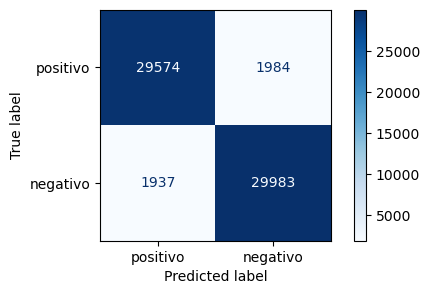

In [31]:
inicio = time.time()
prev_xgbTFIDF = xgbTFIDF.predict(xteste)
ac_xgbTFIDF = accuracy_score(yteste_xgb, prev_xgbTFIDF)
auc = roc_auc_score(yteste_xgb, xgbTFIDF.predict_proba(xteste)[:, 1])
print(f"Acurácia Teste XGBoost Unigrama-TFIDF: {round(ac_xgbTFIDF*100, 2)}%")
print(f"AUC XGBoost Unigrama-TFIDF: {round(auc, 4)}")
fim = time.time()
print(f"Tempo de teste: {round((fim - inicio)/60, 2)} minutos\n\nRelatório:\n")
print(classification_report(yteste_xgb, prev_xgbTFIDF, target_names = ["positivo", "negativo"]))
fig, axes = plt.subplots(figsize = (6, 3))
plot_confusion_matrix(xgbTFIDF, xteste, yteste_xgb, display_labels = ["positivo", "negativo"], values_format = 'd', cmap = 'Blues', ax = axes)
plt.savefig('cm-xgbTFIDF.png', format ='png', bbox_inches = 'tight')
plt.show()

In [32]:
# SALVAR MODELO
dump(xgbTFIDF, "xgbTFIDF.pkl")

['xgbTFIDF.pkl']